In [6]:
import pandas as pd
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-distilroberta-v1")
import numpy as np

In [7]:
df = pd.read_csv("craw_data.json")

In [8]:
dicts = {}

In [9]:
def import_data(json_file_path):
    import json
    import os
    datas = {}
    if os.path.exists(json_file_path):
        with open(json_file_path, 'r') as json_file:
            # Step 5: Read the JSON file and convert it to a dictionary
            datas = json.load(json_file)
        print(datas.keys())
    else:
        print("File does not exist. new dictionary created")
        datas = {}
    return datas

In [10]:
dicts = import_data("craw_data.json")

dict_keys(['@yeoracula', '@ai_istired', '@pacarddoy', '@tatanies', '@krvinSFF', '@milkhoneysweett', '@forcevield', '@oresanna', '@jsicasthanie', '@clarazula', '@xorain_fluffy', '@vandh_', '@wittyhog', '@dreamovermorals', '@seanne_7', '@nanakimbapppp', '@sebewntin', '@parkeujust', '@nagetdinogeprek', '@hanksmumma', '@cexsaaa', '@Chapibaruyaa', '@bukangirlboss', '@piledriverwultz', '@morningandcat', '@juanwmv', '@aj05j8', '@jungauli', '@ArchieRawr', '@Willsens2', '@mocsunJA', '@dapsrst', '@tiaphariteler', '@munyamunya88', '@iessthers', '@lowdydoo', '@XXenatha', '@lanamaulanna', '@akuanakhooman', '@martabakejoe', '@anakomaliong', '@enatdeh', '@capekbgt124', '@gensetterz', '@gabbinhere', '@seericheese', '@geez_ann_', '@polayoid', '@DuncanDonut_', '@hewhoflauntsred', '@aikiropass', '@nishimiow', '@ROisinitial', '@mumbocutie', '@peterrtingle', '@Wh1zKt', '@aizzzzh', '@BaronBram', '@sasalelah', '@tunaable', '@electnibro', '@DlMABUK', '@lesyeuxdeasaa', '@GtMiyye', '@kaiinotherern', '@baratgasw

In [11]:
# 

In [12]:
len(dicts.keys())

115

In [13]:
# convert
from tqdm import tqdm

datas = {}
for key in tqdm(dicts.keys(),"Sentence Embedding"):
    # print("encoding tweet from user "+key)
    tmp = dicts[key]["post"].copy()
    tmp.extend(dicts[key]["replies"])
    if(len(tmp) == 0):
        print("user has no post or tweet")
        continue
    arr = model.encode(tmp[0]).reshape(1,-1)
    for t in tmp[1:]:
        brr = model.encode(str(t))
        arr = np.concatenate((arr,brr.reshape(1,-1)),axis=0)
    # print("finished encoding tweets from user "+key)
    datas[key] = np.mean(arr,axis=0)


Sentence Embedding:   0%|          | 0/115 [00:00<?, ?it/s]

Sentence Embedding:  85%|████████▌ | 98/115 [36:05<07:57, 28.09s/it]

user has no post or tweet


Sentence Embedding: 100%|██████████| 115/115 [39:42<00:00, 20.72s/it]


user has no post or tweet
user has no post or tweet
user has no post or tweet


In [14]:
usernames = list(datas.keys())

In [15]:
encoded_datas = datas[usernames[0]].reshape(1,-1)
for u in usernames[1:]:
    encoded_datas = np.concatenate((encoded_datas,datas[u].reshape(1,-1)),axis=0)

In [16]:
print(len(usernames),encoded_datas.shape)

111 (111, 768)


In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=2)
# running the transformations
result = pca.fit_transform(encoded_datas)

C:\Users\muhammad.hasani\AppData\Local\Temp\ipykernel_27816\392147986.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=[X[0] for X in result],


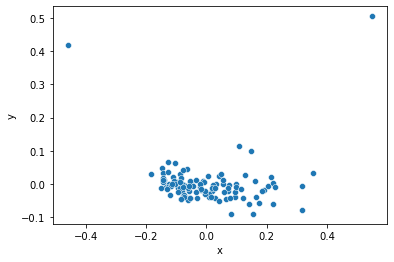

In [22]:
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
sns.scatterplot(x=[X[0] for X in result],
                y=[X[1] for X in result],
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [14]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [ ]:
def k_means(n_cluster = 2,  max_iter= 300, X):
    min_, max_ = uniform()

In [21]:
dbscan_cluster1 = DBSCAN(eps=0.2, min_samples=2)
dbscan_cluster1.fit(encoded_datas)

# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of clusters: 1
Estimated no. of noise points: 16


In [22]:
dbscan_cluster1.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
       -1, -1,  0,  0, -1,  0,  0,  0, -1], dtype=int64)

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

In [31]:
encoded_datas[0]

array([ 1.08547974e-02, -1.79023277e-02, -1.39528941e-02,  4.54235211e-04,
       -1.74026622e-03, -2.94369143e-02, -9.30738915e-03,  1.55093111e-02,
        1.52883362e-02, -2.98085716e-02,  5.99070545e-03, -2.32862234e-02,
       -1.51501112e-02, -1.10638123e-02, -1.21970996e-02, -8.98412894e-04,
        2.25190241e-02,  8.82041920e-03, -1.73196085e-02,  1.53584899e-02,
        2.25200858e-02,  2.88401004e-02, -7.84502737e-03,  2.52086692e-03,
        7.39078224e-03,  5.29714767e-03, -3.50200781e-03, -1.69785079e-02,
       -3.09391916e-02,  3.67593695e-03, -1.29934568e-02,  1.39087420e-02,
       -2.80239433e-03,  8.61898158e-03,  2.44823354e-03,  8.25134851e-03,
        1.42378407e-02, -1.75244436e-02,  2.15006825e-02,  1.01202754e-02,
        4.30684956e-03, -1.01990746e-02,  1.02165416e-02, -2.74660438e-03,
        7.03262805e-04, -3.65155656e-03, -1.00966496e-03, -1.10865608e-02,
       -6.10031560e-03,  5.46111539e-03, -1.15047600e-02, -6.48648152e-03,
       -3.67720099e-03, -

In [37]:
cosine_similarity(encoded_datas[5].reshape(1,-1),encoded_datas[6].reshape(1,-1))

array([[0.9579847]], dtype=float32)

In [33]:
silhouette_score(encoded_datas,dbscan_cluster1.labels_)

0.43703306

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=2, random_state=42)

k = 2
score = silhouette_score(encoded_datas, kmeans.fit_predict(encoded_datas))

In [29]:
tmp = score
while(True):
    k+=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    score = silhouette_score(encoded_datas, kmeans.fit_predict(encoded_datas))
    if(score <= tmp):
        break
    
    tmp = score

In [30]:
print(k)

3


In [32]:
kmeans.fit_predict(encoded_datas)

array([2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0,
       2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0,
       2])

In [31]:
tmp

0.2873589